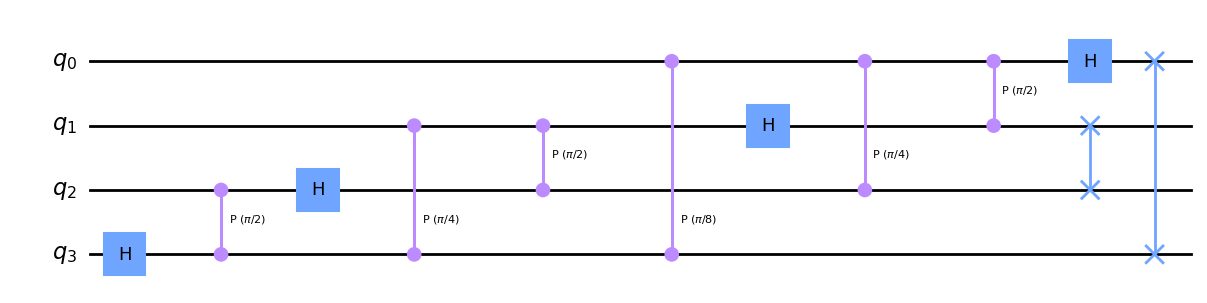

In [1]:
# use for making some figures of QFT circuit dag for the paper

from qiskit.circuit.library import QFT

qc = QFT(4).decompose()
qc.draw(output="mpl")

In [2]:
# line coupling_map
from qiskit.transpiler import CouplingMap

line = CouplingMap.from_line(4)

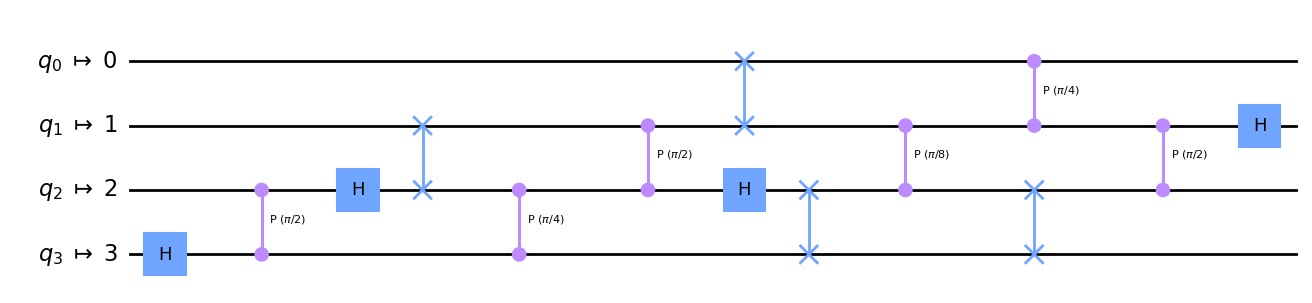

In [41]:
from qiskit import transpile

transp1 = transpile(
    qc, coupling_map=line, optimization_level=3, initial_layout=[0, 1, 2, 3]
)
transp1.draw(output="mpl")

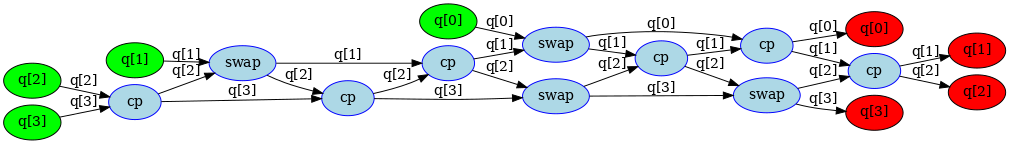

In [42]:
from qiskit.converters import circuit_to_dag

dag = circuit_to_dag(transp1)
# dag only keep 2Q nodes
for node in dag.topological_op_nodes():
    if node.op.num_qubits < 2:
        dag.remove_op_node(node)
dag.draw()

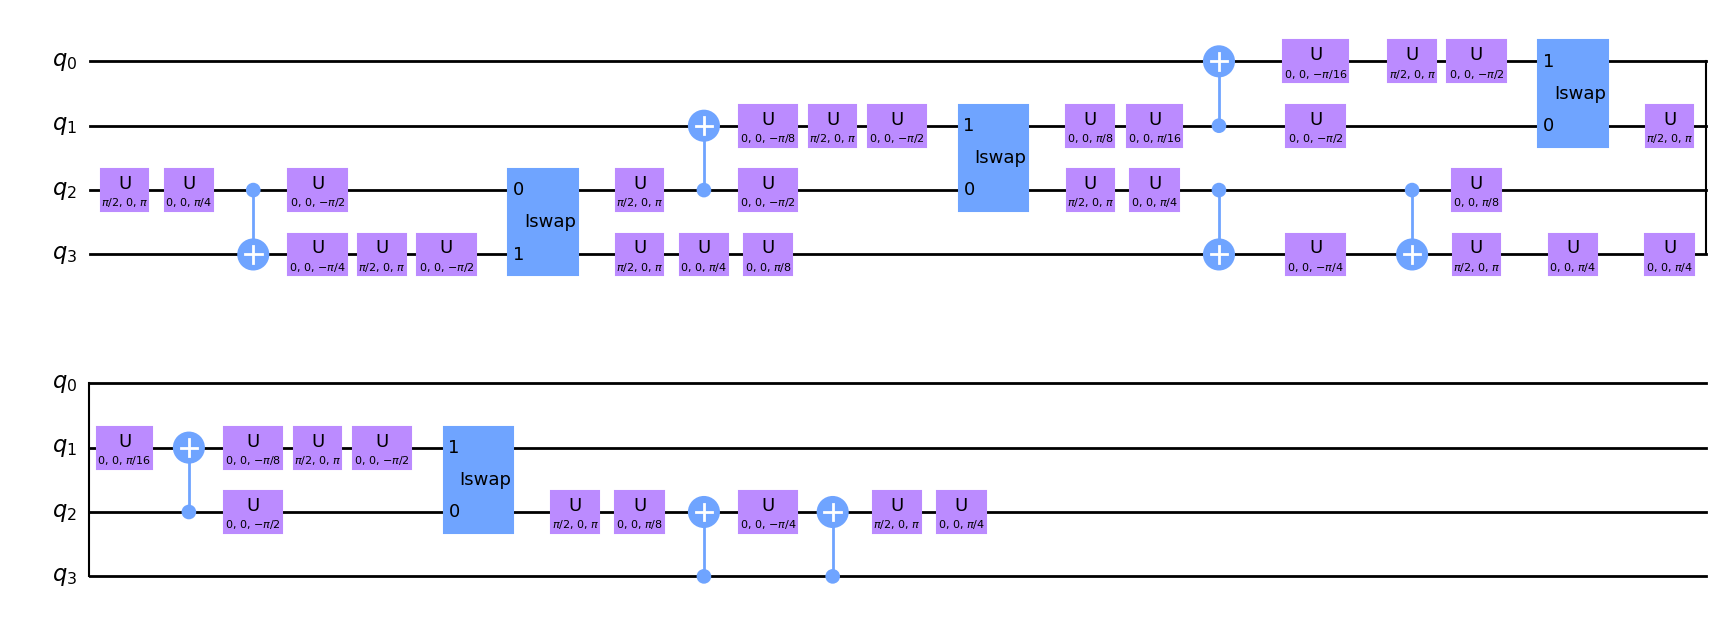

In [44]:
from virtual_swap.pass_managers import SabreVS, SabreQiskit

pm = SabreVS(line)
transp = pm.run(qc)
mid_qc = pm.pm.property_set["circuit_progress"]
mid_qc.draw(output="mpl")
# transp.draw('mpl')

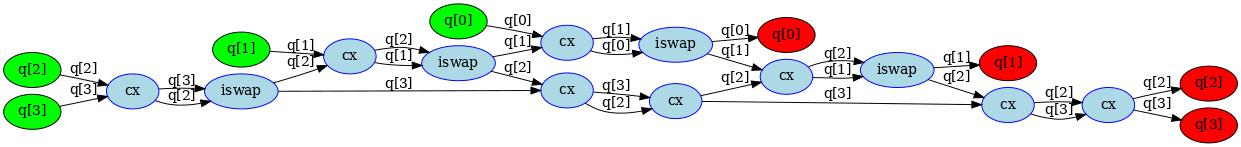

In [31]:
from qiskit.converters import circuit_to_dag

# remove 1Q nodes
dag = circuit_to_dag(mid_qc)
for node in dag.topological_op_nodes():
    if node.op.num_qubits < 2:
        dag.remove_op_node(node)
dag.draw()

In [6]:
pm.pm.property_set["layout"]

Layout({
2: Qubit(QuantumRegister(4, 'q'), 0),
3: Qubit(QuantumRegister(4, 'q'), 1),
0: Qubit(QuantumRegister(4, 'q'), 2),
1: Qubit(QuantumRegister(4, 'q'), 3)
})